## Importing packages and Reading Data

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/Water Potability Dataset.csv'

In [ ]:
# importing the require packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(file_path) # reading the file
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.shape # checking the shape of the dataframe

(3276, 10)

## Exploratory Data Analysis

In [ ]:
df.info() # checkinig the datatype and null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.isna().mean()*100 # toget the %age of the null values in the dataset

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

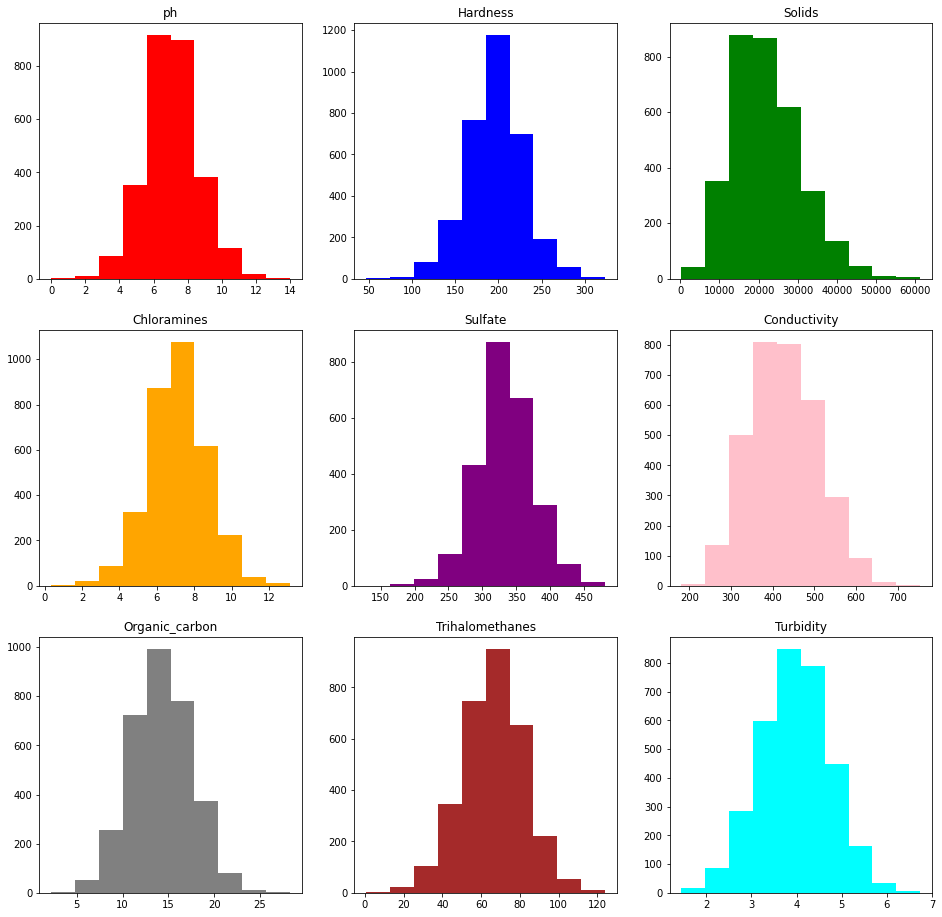

In [ ]:
# crerating the histogram for all the features to see the distribution
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'gray', 'brown', 'cyan']
fig,axs = plt.subplots(3,3,figsize =(16,16))
for i, feature in enumerate(df.columns[:-1]):
    ax = axs[i//3, i%3]
    ax.hist(df[feature], bins=10,color = colors[i])
    ax.set_title(feature)
    
plt.show()

From above histogram, we can see that the all the features are distributed almost normally. Therefore, we can fill the null values using the mean of the feature.

In [ ]:
# filling the null value with the mean
df = df.fillna(df.mean())

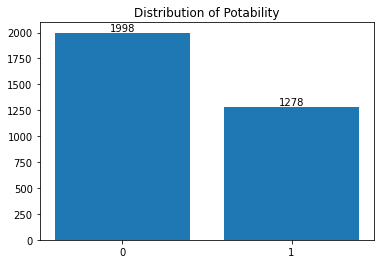

In [ ]:
fig, ax = plt.subplots()

ax.bar(df['Potability'].value_counts().index,df['Potability'].value_counts().values)
ax.set_title('Distribution of Potability')
# ax.xlabel('Potability')
# plt.text(df['Potability'].value_counts().values)
ax.bar_label(ax.containers[0])
ax.set_xticks(df['Potability'].value_counts().index)
plt.show()

The distribution in the traget feature is not highle imbalance.

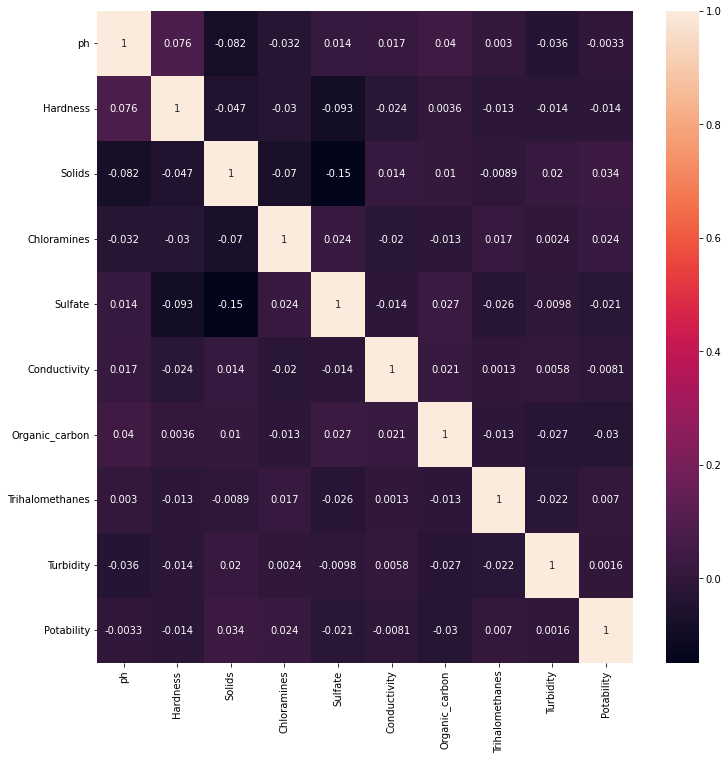

In [ ]:
# printing the correlation matrix
cor = df.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(cor,annot=True)
plt.show()

From above correlation plot, it is clear that there is not any linear correlation for a feature with the target or within the features themselves

## Model Creation and validation

In [ ]:
scaler = RobustScaler() # creating the scaler object to scale the all the numerical feature

In [ ]:
X = df.drop('Potability',axis = 1)
y = df['Potability']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42, shuffle = True, stratify = y)
print(f'shape of the train data : {X_train.shape}')
print(f'shape of the train target : {y_train.shape}')
print(f'shape of the test data : {X_test.shape}')
print(f'shape of the test target : {y_test.shape}')

shape of the train data : (2620, 9)
shape of the train target : (2620,)
shape of the test data : (656, 9)
shape of the test target : (656,)


In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Random Forest

#### Baseline Model

In [ ]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train,y_train)
y_pred_rf = dt.predict(X_test)
rf_acc = dt.score(X_test,y_test)
print(f'Accuracy from Decision Tree : {rf_acc}')
print('Confustion Metrix : ')
print(confusion_matrix(y_test,y_pred_rf))
print('Classification Report')
print(classification_report(y_test,y_pred_rf))

Accuracy from Decision Tree : 0.6036585365853658
Confustion Metrix : 
[[282 118]
 [142 114]]
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.70      0.68       400
           1       0.49      0.45      0.47       256

    accuracy                           0.60       656
   macro avg       0.58      0.58      0.58       656
weighted avg       0.60      0.60      0.60       656



In [ ]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = rf.score(X_test,y_test)
print(f'Accuracy from Random Forest Classifier : {rf_acc}')
print('Confustion Metrix : ')
print(confusion_matrix(y_test,y_pred_rf))
print('Classification Report')
print(classification_report(y_test,y_pred_rf))

Accuracy from Random Forest Classifier : 0.6554878048780488
Confustion Metrix : 
[[350  50]
 [176  80]]
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.88      0.76       400
           1       0.62      0.31      0.41       256

    accuracy                           0.66       656
   macro avg       0.64      0.59      0.59       656
weighted avg       0.65      0.66      0.62       656



#### Hyper-parameter tuning

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(2,20,5)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(2,10,5)]
# Method of selecting samples for training each tree
bootstrap = [True]
criterion = ['gini','entropy']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

In [ ]:
rf = RandomForestClassifier(random_state = 42)
rf_random_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random_search.fit(X_train,y_train)

print(f'Best Parameters using Randomized search : {rf_random_search.best_params_}')
print(f'Best Score using Randomized search : {rf_random_search.best_score_}')

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Parameters using Randomized search : {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini', 'bootstrap': True}
Best Score using Randomized search : 0.6694656488549617


In [ ]:
# using Gridsearch after RandomizedSearch to finetune the parameters
grid = {
    'n_estimators' : [rf_random_search.best_params_['n_estimators'],rf_random_search.best_params_['n_estimators']+50,rf_random_search.best_params_['n_estimators']+100],
    'min_samples_split' : [rf_random_search.best_params_['min_samples_split'],rf_random_search.best_params_['min_samples_split']-1,rf_random_search.best_params_['min_samples_split']+1],
    'min_samples_leaf' : [rf_random_search.best_params_['min_samples_leaf'],rf_random_search.best_params_['min_samples_leaf']-1,rf_random_search.best_params_['min_samples_leaf']+1],
    'max_depth' : [rf_random_search.best_params_['max_depth'],None],
    'max_features' : [rf_random_search.best_params_['max_features']],
    'criterion' : [rf_random_search.best_params_['criterion']],
    'bootstrap' : [rf_random_search.best_params_['bootstrap']]
}
rf_clf = RandomForestClassifier(random_state = 42)
rf_grid_search = GridSearchCV(rf_clf,grid,n_jobs = -1,cv=5,verbose = 3)
rf_grid_search.fit(X_train,y_train)

print(f'Best Parameters using Grid search : {rf_grid_search.best_params_}')
print(f'Best Score using Grid search : {rf_grid_search.best_score_}')

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters using Grid search : {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score using Grid search : 0.6744274809160304


In [ ]:
y_pred_rf = rf_grid_search.predict(X_test)
rf_acc = rf_grid_search.score(X_test,y_test)
print(f'Accuracy from Random Forest after hyper parameter tuning : {rf_acc}')
print('Confustion Metrix : ')
print(confusion_matrix(y_test,y_pred_rf))
print('Classification Report')
print(classification_report(y_test,y_pred_rf))

Accuracy from Random Forest after hyper parameter tuning : 0.6570121951219512
Confustion Metrix : 
[[351  49]
 [176  80]]
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.88      0.76       400
           1       0.62      0.31      0.42       256

    accuracy                           0.66       656
   macro avg       0.64      0.59      0.59       656
weighted avg       0.65      0.66      0.62       656

